In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

In [41]:
bom = pd.read_csv("./zippedData/bom.movie_gross.csv.gz")
movie_info = pd.read_csv("./zippedData/rt.movie_info.tsv.gz", sep = '\t')
#reviews = pd.read_csv("./zippedData/rt.reviews.tsv.gz", sep = '\t')
movies = pd.read_csv("./zippedData/tmdb.movies.csv.gz")
budgets = pd.read_csv("./zippedData/tn.movie_budgets.csv.gz")

In [89]:
numbers = budgets.copy()



#funtion for cleaning
def clean_a_money_column(df, series_title):
    df[series_title] = df[series_title].str.replace('$','')
    df[series_title] = df[series_title].str.replace(',','')
    df[series_title] = pd.to_numeric(df[series_title])
    return df



#remove $ string
numbers = clean_a_money_column(numbers,'worldwide_gross')
numbers = clean_a_money_column(numbers,'domestic_gross')
numbers = clean_a_money_column(numbers,'production_budget')



# new column foreign_gross, Profit Margin, ROI
numbers['net_income'] = numbers['worldwide_gross'] - numbers['production_budget']
numbers['foreign_gross'] = numbers['worldwide_gross'] - numbers['domestic_gross']
numbers['profit_margin'] = (numbers['net_income']*100)/numbers['worldwide_gross']
numbers.loc[numbers['profit_margin'] == float('-inf'), 'profit_margin'] = 0
numbers['ROI'] = (numbers['net_income']/numbers['production_budget'])*100



# new columns month and year 
numbers['Year'] = pd.to_numeric(numbers['release_date'].map(lambda x: x[-4:]))
numbers['Month'] = numbers['release_date'].map(lambda x: x[:3])



#check for dupes
movie_dupes = pd.Series(numbers['movie'].value_counts())
title_dupes = [movie_dupes.index[index] for index in list(range(len(movie_dupes))) if movie_dupes.values[index] > 1]
numbers[numbers['movie'].isin(title_dupes)]

numbers.head(5)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,profit_margin,ROI,Year,Month
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2351345279,2015837654,84.692106,553.257713,2009,Dec
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,804600000,60.733080,154.667286,2011,May
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,-200237650,107000000,-133.703598,-57.210757,2019,Jun
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,944008095,76.436443,324.384139,2015,May
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,696540365,75.925058,315.369636,2017,Dec


0.6087521471718839

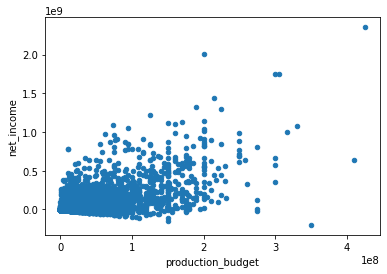

In [199]:
numbers.plot('production_budget', 'net_income', kind='scatter')
net_income_corr = numbers['net_income'].corr(numbers['production_budget'])
net_income_corr

-0.048714813629511675

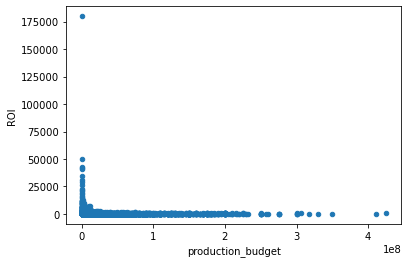

In [201]:
numbers.plot('production_budget', 'ROI', kind='scatter')
ROI_corr = numbers['ROI'].corr(numbers['production_budget'])
ROI_corr

0.025213027789145116

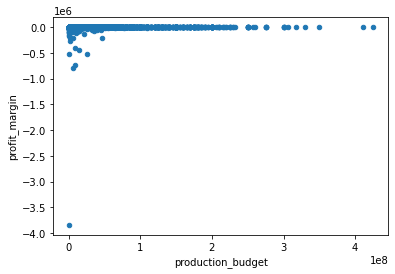

In [203]:
numbers.plot('production_budget', 'profit_margin', kind='scatter')
profit_margin_corr = numbers['profit_margin'].corr(numbers['production_budget'])
profit_margin_corr

0.7421607595182879

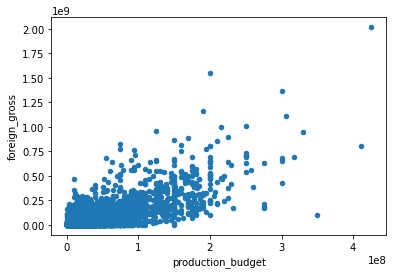

In [204]:
numbers.plot('production_budget', 'foreign_gross', kind='scatter')
foreign_gross_corr = numbers['foreign_gross'].corr(numbers['production_budget'])
foreign_gross_corr

0.6856818396752725

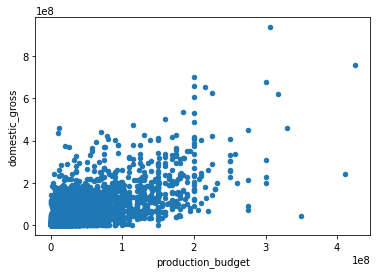

In [205]:
numbers.plot('production_budget', 'domestic_gross', kind='scatter')
domestic_gross_corr = numbers['domestic_gross'].corr(numbers['production_budget'])
domestic_gross_corr

0.7483059765694748

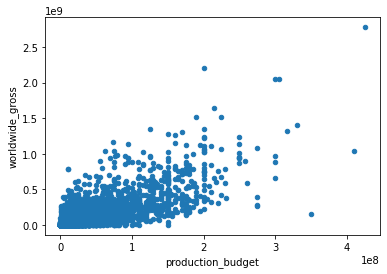

In [207]:
numbers.plot('production_budget', 'worldwide_gross', kind='scatter')
worldwide_gross_corr = numbers['worldwide_gross'].corr(numbers['production_budget'])
worldwide_gross_corr

0.9781896211969949

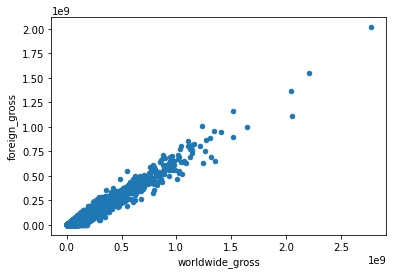

In [208]:
numbers.plot('worldwide_gross', 'foreign_gross', kind='scatter')
worldwide_gross_corr = numbers['worldwide_gross'].corr(numbers['foreign_gross'])
worldwide_gross_corr

0.9388532353514975

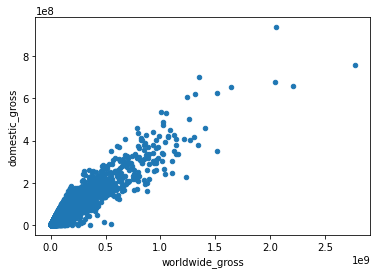

In [209]:
numbers.plot('worldwide_gross', 'domestic_gross', kind='scatter')
worldwide_gross_corr = numbers['worldwide_gross'].corr(numbers['domestic_gross'])
worldwide_gross_corr

In [236]:
net_income_top_10 = numbers.sort_values(by=['net_income'], ascending=False)
foreign_gross_top_10 = numbers.sort_values(by=['foreign_gross'], ascending=False)
domestic_gross_top_10 = numbers.sort_values(by=['domestic_gross'], ascending=False)
worldwide_gross_top_10 = numbers.sort_values(by=['worldwide_gross'], ascending=False)
profit_margin_top_10 = numbers.sort_values(by=['profit_margin'], ascending=False)[0:100]
ROI_top_10 = numbers.sort_values(by=['ROI'], ascending=False)[1:10]
production_budget_top_10 = numbers.sort_values(by=['production_budget'], ascending=False)

In [237]:
z = np.polyfit(ROI_top_10['production_budget'], ROI_top_10['ROI'], deg=2)
xfit=np.linspace(min(ROI_top_10['production_budget']),max(ROI_top_10['production_budget']), 1000)
yfit=np.polyval(z, xfit)

In [238]:
ROI_top_10['ROI_deriv'] = np.polyval(z, ROI_top_10['production_budget'])

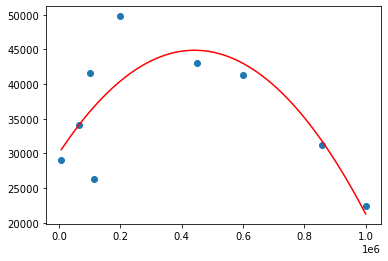

In [239]:
plt.scatter(ROI_top_10['production_budget'], ROI_top_10['ROI'])
plt.plot(xfit, yfit, color='r');

In [240]:
ROI_corr = ROI_top_10['production_budget'].corr(numbers['ROI'])
ROI_corr

-0.27817002471423696

In [214]:
ROI_top_10.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,net_income,foreign_gross,profit_margin,ROI,Year,Month,ROI_deriv
5745,46,"Jun 30, 1972",Deep Throat,25000,45000000,45000000,44975000,0,99.944444,179900.000000,1972,Jun,68303.379432
5613,14,"Mar 21, 1980",Mad Max,200000,8750000,99750000,99550000,91000000,99.799499,49775.000000,1980,Mar,52062.528052
5492,93,"Sep 25, 2009",Paranormal Activity,450000,107918810,194183034,193733034,86264224,99.768260,43051.785333,2009,Sep,35932.798612
5679,80,"Jul 10, 2015",The Gallows,100000,22764410,41656474,41556474,18892064,99.759941,41556.474000,2015,Jul,60843.850780
5406,7,"Jul 14, 1999",The Blair Witch Project,600000,140539099,248300000,247700000,107760901,99.758357,41283.333333,1999,Jul,30248.271150


In [25]:
conn = sqlite3.connect("./zippedData/im.db")

In [30]:
df_sql = pd.read_sql("""
SELECT * 
FROM sqlite_master """, conn)
df_sql

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [215]:
df_sql = pd.read_sql('''
SELECT *
FROM movie_basics
''', conn)

df_sql.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [67]:
df_sql = pd.read_sql('''
SELECT *
FROM directors
''', conn)

df_sql.head(5)

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [223]:
df_sql_basics_directors = pd.read_sql('''
SELECT *
FROM movie_basics
JOIN directors
    USING(movie_id)    
''', conn)
df_sql_basics_directors.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",nm0712540
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",nm0002411


In [222]:
df_sql = pd.read_sql('''
SELECT *
FROM movie_basics
JOIN directors ON movie_basics
''', conn)
df_sql.head(5)

DatabaseError: Execution failed on sql '
SELECT *
FROM persons
JOIN df_sql_basics_directors
    USING(person_id)
': no such table: df_sql_basics_directors